In [1]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [2]:
accuracy_list = []

In [3]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.3
learning_rate=1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [4]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])

In [5]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [6]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


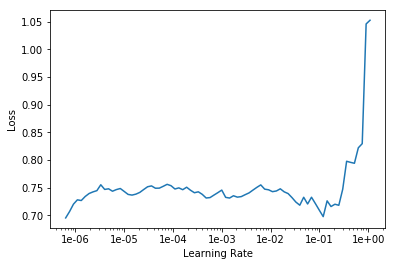

In [7]:
learn.recorder.plot()

In [8]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:36
epoch  train_loss  valid_loss  accuracy
1      0.657921    0.595435    0.633205  (00:09)
2      0.682203    0.699539    0.548263  (00:08)
3      0.646843    0.610132    0.679537  (00:09)
4      0.641349    0.545624    0.756757  (00:08)



In [9]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:49
epoch  train_loss  valid_loss  accuracy
1      0.661646    0.546143    0.768340  (00:18)
2      0.604144    0.513139    0.810811  (00:22)
3      0.588708    0.504715    0.779923  (00:19)
4      0.583289    0.485093    0.806950  (00:21)
5      0.610562    0.489479    0.818533  (00:19)
6      0.593865    0.416972    0.864865  (00:19)
7      0.574662    0.414621    0.864865  (00:18)
8      0.468967    0.372606    0.868726  (00:25)
9      0.486946    0.361636    0.891892  (00:22)
10     0.545257    0.342438    0.884170  (00:18)
11     0.499649    0.301689    0.872587  (00:20)
12     0.483052    0.330841    0.907336  (00:21)
13     0.494426    0.323979    0.907336  (00:19)
14     0.441012    0.291147    0.915058  (00:22)
15     0.484375    0.268502    0.918919  (00:18)
16     0.449864    0.280368    0.915058  (00:19)
17     0.423303    0.252562    0.918919  (00:20)
18     0.419198    0.255731    0.915058  (00:21)
19     0.410989    0.235641    0.930502  (00:21)
20     0.43

In [10]:
learn.validate()

[0.25251016, tensor(0.9189)]

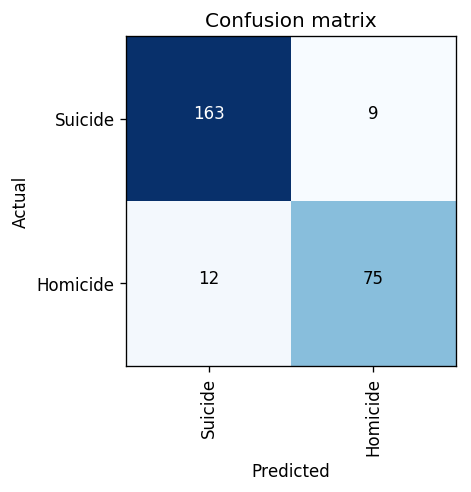

In [11]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

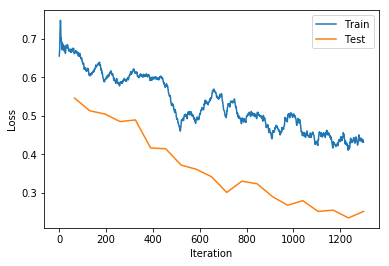

In [12]:
learn.recorder.plot_losses()

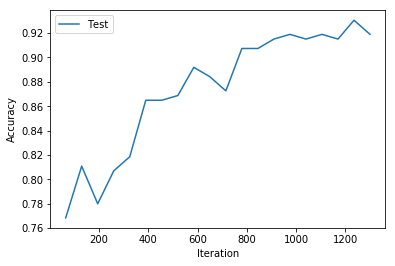

In [13]:
learn.recorder.plot_metrics()

In [14]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [15]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


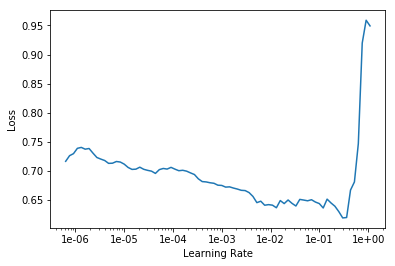

In [16]:
learn.recorder.plot()

In [17]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      0.631732    0.600793    0.679537  (00:08)
2      0.620309    0.552570    0.733591  (00:07)
3      0.599420    0.520114    0.783784  (00:08)
4      0.567353    0.521462    0.803089  (00:09)



In [18]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:19
epoch  train_loss  valid_loss  accuracy
1      0.533537    0.516648    0.826255  (00:23)
2      0.543842    0.480128    0.822394  (00:21)
3      0.569478    0.440581    0.806950  (00:19)
4      0.518483    0.461474    0.826255  (00:22)
5      0.509360    0.414784    0.861004  (00:21)
6      0.462084    0.397331    0.861004  (00:25)
7      0.485889    0.380067    0.891892  (00:23)
8      0.447857    0.387637    0.876448  (00:25)
9      0.464156    0.397266    0.888031  (00:20)
10     0.460586    0.379059    0.880309  (00:21)
11     0.468427    0.342724    0.907336  (00:20)
12     0.466440    0.308530    0.903475  (00:21)
13     0.430297    0.298805    0.922780  (00:23)
14     0.413816    0.274320    0.926641  (00:22)
15     0.389101    0.289651    0.918919  (00:22)
16     0.418290    0.294317    0.911197  (00:20)
17     0.442316    0.258431    0.918919  (00:18)
18     0.402060    0.267741    0.903475  (00:21)
19     0.400928    0.270630    0.922780  (00:21)
20     0.36

In [19]:
learn.validate()

[0.26146284, tensor(0.9189)]

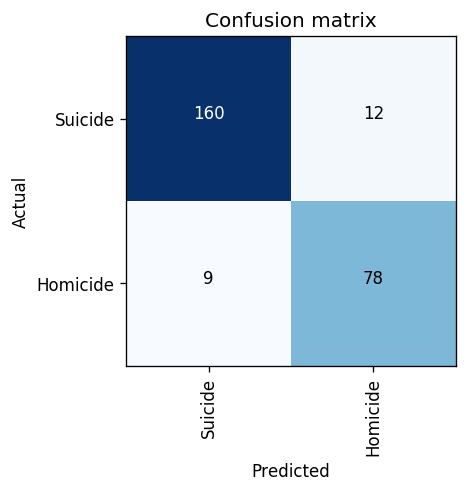

In [20]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

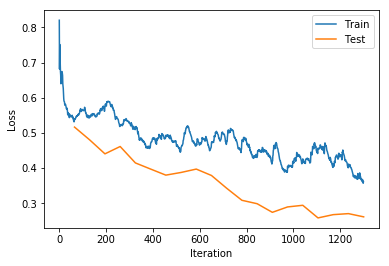

In [21]:
learn.recorder.plot_losses()

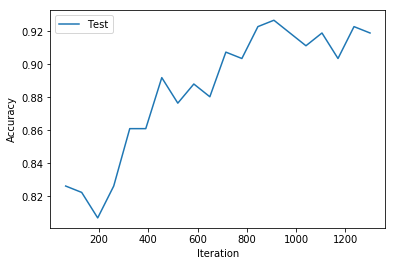

In [22]:
learn.recorder.plot_metrics()

In [23]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [24]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


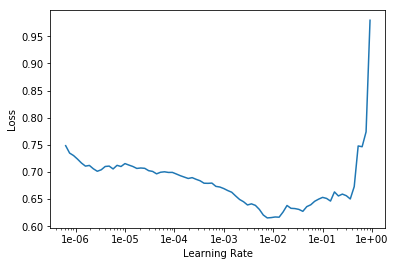

In [25]:
learn.recorder.plot()

In [26]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:32
epoch  train_loss  valid_loss  accuracy
1      0.631291    0.598262    0.698842  (00:08)
2      0.645637    0.545626    0.768340  (00:07)
3      0.628003    0.524303    0.776062  (00:07)
4      0.608026    0.510369    0.810811  (00:08)



In [27]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:14
epoch  train_loss  valid_loss  accuracy
1      0.603813    0.498747    0.822394  (00:19)
2      0.554827    0.504020    0.830116  (00:21)
3      0.548816    0.471219    0.861004  (00:22)
4      0.493207    0.432079    0.853282  (00:24)
5      0.535837    0.438415    0.884170  (00:19)
6      0.513492    0.416038    0.864865  (00:22)
7      0.517182    0.405197    0.895753  (00:21)
8      0.484819    0.385870    0.884170  (00:22)
9      0.472429    0.363428    0.895753  (00:23)
10     0.491787    0.356048    0.915058  (00:19)
11     0.481557    0.340492    0.899614  (00:21)
12     0.498410    0.351270    0.903475  (00:18)
13     0.465789    0.331361    0.922780  (00:21)
14     0.471794    0.327011    0.922780  (00:19)
15     0.390752    0.312956    0.922780  (00:25)
16     0.441853    0.305932    0.918919  (00:19)
17     0.408085    0.291708    0.922780  (00:22)
18     0.409223    0.266352    0.918919  (00:23)
19     0.385777    0.273915    0.930502  (00:22)
20     0.37

In [28]:
learn.validate()

[0.24720785, tensor(0.9228)]

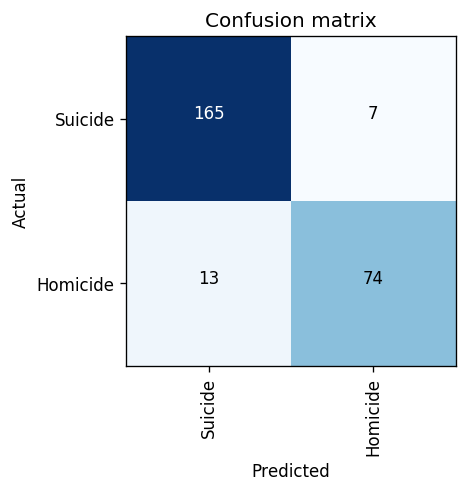

In [29]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

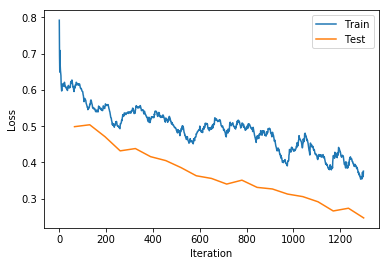

In [30]:
learn.recorder.plot_losses()

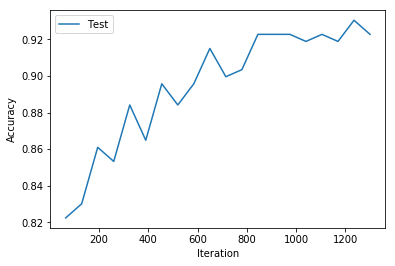

In [31]:
learn.recorder.plot_metrics()

In [32]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [33]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


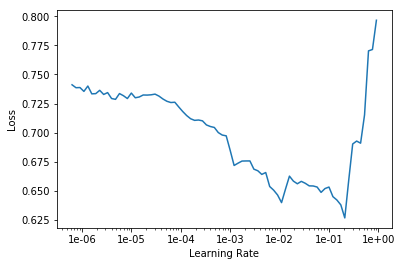

In [34]:
learn.recorder.plot()

In [35]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      0.660030    0.551546    0.776062  (00:08)
2      0.635544    0.535549    0.783784  (00:08)
3      0.622900    0.514348    0.833977  (00:08)
4      0.619808    0.516367    0.803089  (00:07)



In [36]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:13
epoch  train_loss  valid_loss  accuracy
1      0.569322    0.528797    0.803089  (00:21)
2      0.605810    0.461002    0.822394  (00:18)
3      0.566392    0.436461    0.868726  (00:23)
4      0.538292    0.422487    0.857143  (00:23)
5      0.508288    0.401924    0.911197  (00:22)
6      0.499462    0.394311    0.891892  (00:21)
7      0.511493    0.410451    0.891892  (00:21)
8      0.527547    0.340805    0.926641  (00:19)
9      0.473071    0.381282    0.884170  (00:23)
10     0.484950    0.330301    0.918919  (00:21)
11     0.435261    0.315323    0.918919  (00:24)
12     0.490618    0.302734    0.907336  (00:18)
13     0.481523    0.321056    0.895753  (00:20)
14     0.455184    0.277048    0.926641  (00:21)
15     0.424556    0.295888    0.911197  (00:21)
16     0.380916    0.300330    0.911197  (00:24)
17     0.410057    0.294967    0.907336  (00:19)
18     0.403301    0.253605    0.938224  (00:23)
19     0.381724    0.251990    0.930502  (00:22)
20     0.40

In [37]:
learn.validate()

[0.29367304, tensor(0.9073)]

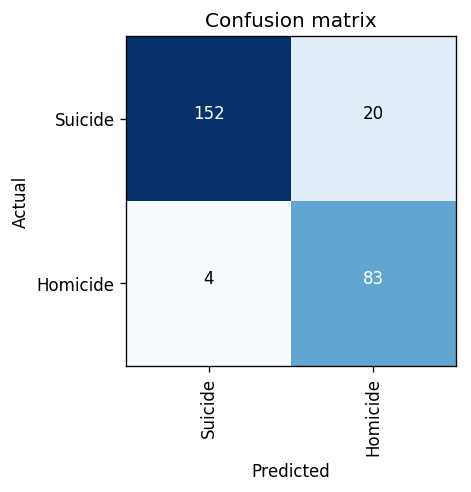

In [38]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

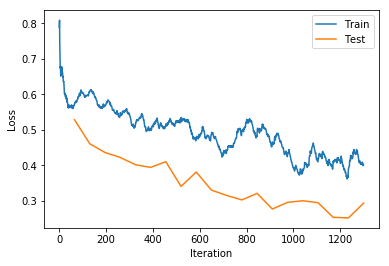

In [39]:
learn.recorder.plot_losses()

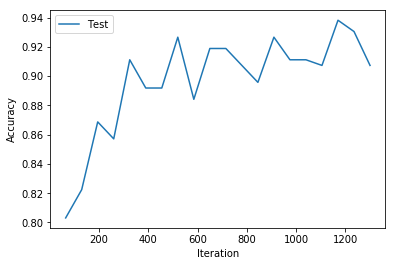

In [40]:
learn.recorder.plot_metrics()

In [41]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [42]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


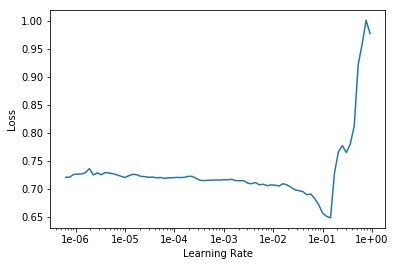

In [43]:
learn.recorder.plot()

In [44]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:35
epoch  train_loss  valid_loss  accuracy
1      0.692824    0.536838    0.833977  (00:07)
2      0.620942    0.546167    0.764479  (00:09)
3      0.601988    0.559790    0.745174  (00:09)
4      0.583435    0.524725    0.799228  (00:09)



In [45]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:21
epoch  train_loss  valid_loss  accuracy
1      0.583505    0.546055    0.764479  (00:23)
2      0.546697    0.492515    0.833977  (00:24)
3      0.555047    0.511109    0.826255  (00:24)
4      0.531779    0.484324    0.849421  (00:21)
5      0.521519    0.465749    0.833977  (00:23)
6      0.511398    0.429946    0.872587  (00:23)
7      0.567597    0.398928    0.841699  (00:18)
8      0.495372    0.398135    0.849421  (00:22)
9      0.487099    0.384824    0.872587  (00:22)
10     0.482583    0.367018    0.895753  (00:23)
11     0.460729    0.342553    0.884170  (00:23)
12     0.459848    0.402747    0.864865  (00:21)
13     0.509239    0.347724    0.899614  (00:18)
14     0.481026    0.323438    0.895753  (00:22)
15     0.450017    0.282127    0.922780  (00:22)
16     0.442059    0.261704    0.942085  (00:21)
17     0.404958    0.291711    0.918919  (00:21)
18     0.390441    0.282151    0.918919  (00:23)
19     0.427332    0.253109    0.922780  (00:19)
20     0.41

In [46]:
learn.validate()

[0.24877456, tensor(0.9421)]

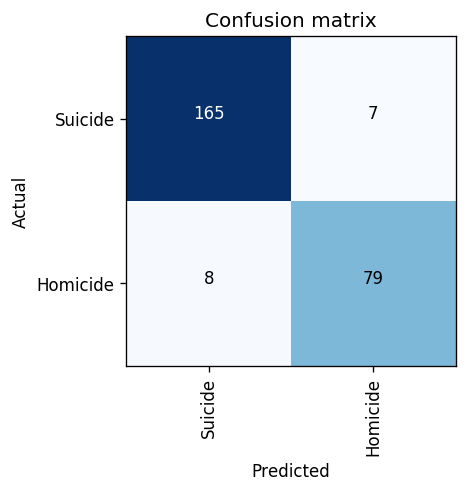

In [47]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

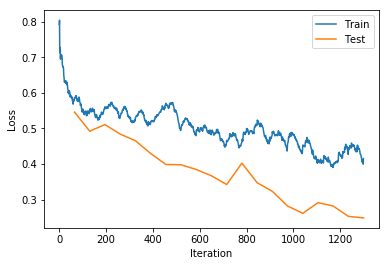

In [48]:
learn.recorder.plot_losses()

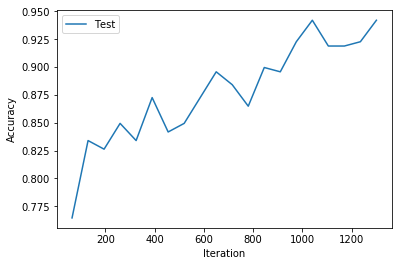

In [49]:
learn.recorder.plot_metrics()

In [50]:
print(accuracy_list)

[0.9189189076423645, 0.9189189076423645, 0.92277991771698, 0.9073359370231628, 0.9420849680900574]


In [51]:
print(sum(accuracy_list)/len(accuracy_list))

0.9220077276229859


In [52]:
import torch

torch.cuda.empty_cache()